# 1. 필요한 모듈 불러오기 및 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [ ]:
df = pd.DataFrame(house.data, columns = house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.shape

(20640, 9)

# 2. Train/Test dataset 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size = 0.1, random_state = 2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

# 3. 모델 정의/설정/학습

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
                    Dense(64, input_dim = 8, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(4, activation = 'relu'),
                    Dense(2, activation = 'relu'),
                    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
hist = model.fit(X_train, y_train, batch_size=400, epochs=200, validation_split=0.2)

# 5. 시각화

In [ ]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

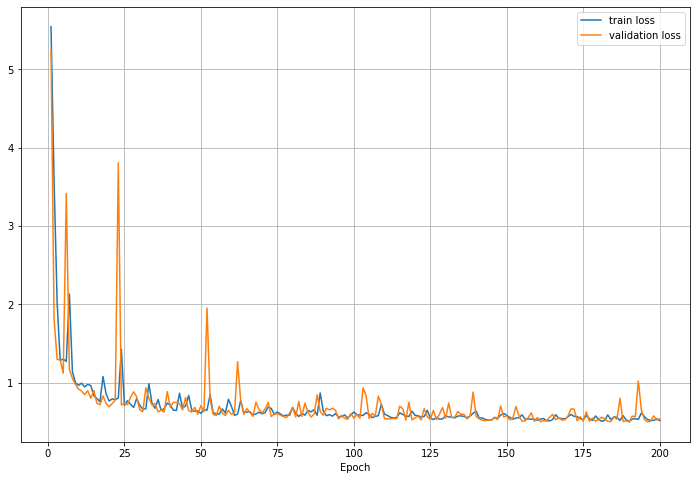

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(xs, y_loss, label = 'train loss')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.show()

# 6. 다른 모델 만들어서 훈련

In [ ]:
del model2

In [ ]:
model2 = Sequential([
                    Dense(256, input_dim = 8, activation = 'relu'),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(4, activation = 'relu'),
                    Dense(2, activation = 'relu'),
                    Dense(1)
])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 256)               2304      
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 8)                 136       
                                                                 
 dense_61 (Dense)            (None, 4)                

In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path2 = 'california_house2.h5'
checkpoint = ModelCheckpoint(
    model_path2, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=40)

In [ ]:
hist2 = model2.fit(X_train, y_train, batch_size=128, epochs=1000, validation_split=0.2,
                   verbose = 0, callbacks = [checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 1.53999, saving model to california_house2.h5

Epoch 00002: val_loss improved from 1.53999 to 1.24719, saving model to california_house2.h5

Epoch 00003: val_loss did not improve from 1.24719

Epoch 00004: val_loss improved from 1.24719 to 1.19287, saving model to california_house2.h5

Epoch 00005: val_loss improved from 1.19287 to 0.69485, saving model to california_house2.h5

Epoch 00006: val_loss improved from 0.69485 to 0.64998, saving model to california_house2.h5

Epoch 00007: val_loss did not improve from 0.64998

Epoch 00008: val_loss did not improve from 0.64998

Epoch 00009: val_loss improved from 0.64998 to 0.60147, saving model to california_house2.h5

Epoch 00010: val_loss did not improve from 0.60147

Epoch 00011: val_loss improved from 0.60147 to 0.56328, saving model to california_house2.h5

Epoch 00012: val_loss did not improve from 0.56328

Epoch 00013: val_loss did not improve from 0.56328

Epoch 00014: val_loss did not imp

In [ ]:
y_loss = hist2.history['loss'][2:]
y_vloss = hist2.history['val_loss'][2:]
xs = np.arange(3, len(y_loss)+3)

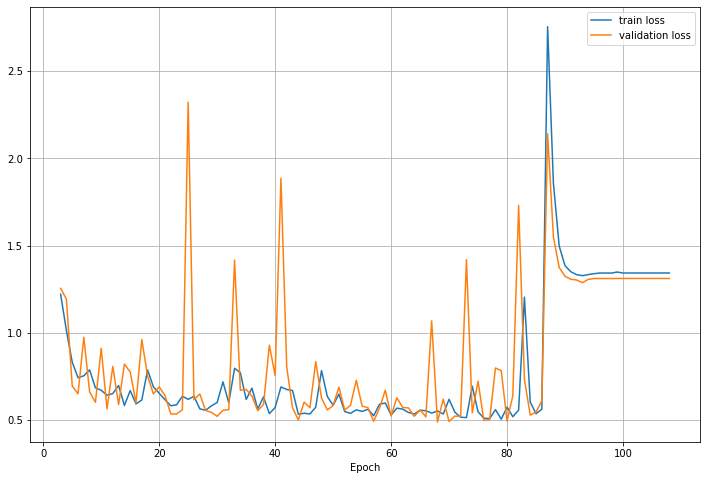

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(xs, y_loss, label = 'train loss')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.show()